In [55]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PyMol
from rdkit.Chem.Subshape import SubshapeAligner,SubshapeBuilder,SubshapeObjects

In [57]:
mols = [m for m in Chem.SDMolSupplier('pd1_all.sdf')]

In [60]:
### _Name prop is required for align with shape-it
for m in mols:
    molid = m.GetProp('SubstanceID')
    m.SetProp('_Name',molid)

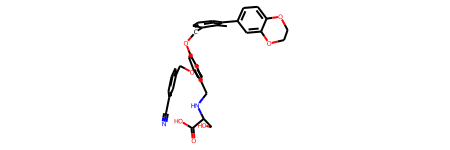

In [61]:
refmols = [m for m in Chem.SDMolSupplier('reference1.sdf')]
refmol = refmols[0]
refmol

In [62]:
#v = PyMol.MolViewer()
print(len(mols))
#ref = Chem.Mol(mols[0].ToBinary())
ref = Chem.Mol(refmol.ToBinary())
#probe = Chem.Mol(mols[5].ToBinary())
### re-orient x,y,z axis ###
AllChem.CanonicalizeConformer(ref.GetConformer()) 

16565


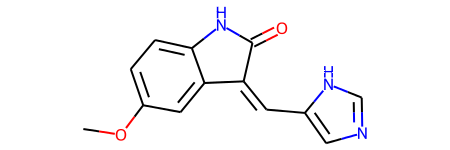

In [45]:
mols[9]

In [64]:
w = Chem.SDWriter('probe0310_pd1_1_10.sdf')
#for i in range(0,len(mols)):
for i in range(0,1):
    probe = Chem.Mol(mols[i].ToBinary())
    builder = SubshapeBuilder.SubshapeBuilder()
    builder.gridDims=(20.,20.,10)
    builder.gridSpacing=0.5
    builder.winRad=4.
    refshape = builder.GenerateSubshapeShape(ref)
    probeshape = builder.GenerateSubshapeShape(probe)
    aligner = SubshapeAligner.SubshapeAligner()
    algs = aligner.GetSubshapeAlignments(ref,refshape,probe,probeshape,builder)
    ### new code ###
    sorted_algs = sorted(algs,key=lambda x:x.shapeDist)
    if sorted_algs:
        alg = sorted_algs[0]
    ### end of new code ###
        AllChem.TransformMol(probe,alg.transform)
    #newprobeshape = builder(probe)
    #with Chem.SDWriter('probe0310.sdf') as w:
    #for m in ref:
        print(i)
        print(1.0-alg.shapeDist,alg.shapeDist)
        probe.SetProp('Energy',str(1.0-alg.shapeDist))
        w.write(probe)
w.close()

KeyboardInterrupt: 

In [16]:
for alg in algs:
    print(1.0-alg.shapeDist)
res = sorted(algs,key=lambda x:x.shapeDist)

0.8317972350230415
0.8422664624808576
0.8260869565217391
0.8625350675847998
0.8343119734490682
0.8437261389666582
0.85721570627231
0.8218862121988724
0.8565931246793227
0.8524296675191816
0.8749044585987261
0.819718309859155
0.8399693721286371
0.8051150895140665
0.8873060290002543
0.8458608430675469
0.844637829536729
0.8818737270875764
0.8332063975628332
0.8563789152024446
0.8759551706571574
0.8601327207759061
0.8806312038686689
0.8697650663942799
0.842479674796748
0.8770721754654425
0.8080163390349757
0.8095116988809766
0.8200305033045246
0.8447616619933724
0.8619897959183673
0.8084944048830112
0.8409497064079653
0.8200559938915755
0.8287461773700306
0.8192464358452138
0.8607983623336746
0.8066734589913398
0.8134252169474221
0.8873885350318471
0.8480852143038295
0.8296409472880061
0.861734693877551
0.8482758620689655
0.8660555131143366
0.8445688120071229
0.8817231710425695
0.846231920832276
0.8520694941236586
0.8100102145045965
0.8686559551134915
0.8215746421267893
0.8025316455696203


In [17]:
for alg in res:
    print(1.0-alg.shapeDist)

0.8873885350318471
0.8873060290002543
0.8823379275140377
0.8818737270875764
0.8817231710425695
0.8806312038686689
0.8770721754654425
0.8759551706571574
0.8749044585987261
0.8697650663942799
0.8686559551134915
0.8660555131143366
0.8656297807241203
0.8654970760233918
0.8625350675847998
0.8619897959183673
0.861734693877551
0.8607983623336746
0.8601327207759061
0.8576874205844981
0.85721570627231
0.8565931246793227
0.8563789152024446
0.854368932038835
0.8524296675191816
0.8520694941236586
0.8518707050139984
0.8497593108690145
0.8493991306571209
0.8490035769034237
0.8482758620689655
0.8480852143038295
0.846231920832276
0.8458608430675469
0.8447616619933724
0.844637829536729
0.8445688120071229
0.8439806566556376
0.8439086294416244
0.8437261389666582
0.842479674796748
0.8422664624808576
0.8409497064079653
0.8399693721286371
0.8389312977099237
0.8375286041189931
0.8357598978288634
0.8343119734490682
0.8332063975628332
0.8321428571428572
0.8317972350230415
0.83141468406242
0.8300586884409288
0.

In [17]:
aligner = SubshapeAligner.SubshapeAligner()
algs = aligner.GetSubshapeAlignments(ref,refshape,probe,probeshape,builder)

RDKit INFO: [09:20:13] INFO: Generating triangle matches
RDKit INFO: [09:20:13] INFO: Got 7367 possible alignments in 0.1 seconds
RDKit INFO: [09:20:13] INFO: Doing direction pruning
RDKit INFO: [09:20:13] INFO: 2974 possible alignments remain. (0.2 seconds required)
RDKit INFO: [09:20:13] INFO: Shape-based Pruning
RDKit INFO: [09:20:13] INFO:   processed 100 of 2974. 2876 alignments remain
RDKit INFO: [09:20:14] INFO:   processed 200 of 2974. 2776 alignments remain
RDKit INFO: [09:20:14] INFO:   processed 300 of 2974. 2676 alignments remain
RDKit INFO: [09:20:14] INFO:   processed 400 of 2974. 2580 alignments remain
RDKit INFO: [09:20:15] INFO:   processed 500 of 2974. 2482 alignments remain
RDKit INFO: [09:20:15] INFO:   processed 600 of 2974. 2382 alignments remain
RDKit INFO: [09:20:15] INFO:   processed 700 of 2974. 2282 alignments remain
RDKit INFO: [09:20:16] INFO:   processed 800 of 2974. 2183 alignments remain
RDKit INFO: [09:20:16] INFO:   processed 900 of 2974. 2083 alignmen

[09:20:13] INFO: Generating triangle matches
[09:20:13] INFO: Got 7367 possible alignments in 0.1 seconds
[09:20:13] INFO: Doing direction pruning
[09:20:13] INFO: 2974 possible alignments remain. (0.2 seconds required)
[09:20:13] INFO: Shape-based Pruning
[09:20:13] INFO:   processed 100 of 2974. 2876 alignments remain
[09:20:14] INFO:   processed 200 of 2974. 2776 alignments remain
[09:20:14] INFO:   processed 300 of 2974. 2676 alignments remain
[09:20:14] INFO:   processed 400 of 2974. 2580 alignments remain
[09:20:15] INFO:   processed 500 of 2974. 2482 alignments remain
[09:20:15] INFO:   processed 600 of 2974. 2382 alignments remain
[09:20:15] INFO:   processed 700 of 2974. 2282 alignments remain
[09:20:16] INFO:   processed 800 of 2974. 2183 alignments remain
[09:20:16] INFO:   processed 900 of 2974. 2083 alignments remain
[09:20:16] INFO:   processed 1000 of 2974. 1989 alignments remain
[09:20:16] INFO:   processed 1100 of 2974. 1901 alignments remain
[09:20:17] INFO:   process

In [18]:
alg = algs[0]
AllChem.TransformMol(probe,alg.transform)
newprobeshape = builder(probe)

In [19]:
with Chem.SDWriter('ref0310.sdf') as w:
    #for m in ref:
    w.write(ref)
w.close()

In [20]:
with Chem.SDWriter('probe0310.sdf') as w:
    #for m in ref:
    w.write(probe)
w.close()